<a href="https://colab.research.google.com/github/marayyy/Krayo/blob/Guvi/Krayo_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Krayo Task

**Scenario: Forecasting Expenditures based on past data for X Company**

**Business Problem:** Bratva Company is a mid-sized enterprise operating in a dynamic business environment. To ensure financial stability and effective resource allocation, the company needs to accurately forecast its future expenditures. Understanding how much the company is likely to spend in different expense categories, such as rent, salaries, and more

**Submitted By: Raj kumar.s**

# Step 1: Setup
**Installed Required Libraries:**

In [ ]:
!pip install pandas numpy matplotlib plotly pmdarima statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Data

**Loaded the Dataset:**

Loaded the expenditure dataset from the provided CSV file, which contains columns like Year, Month, and various expenditure categories.

In [ ]:
import pandas as pd
data = pd.read_excel("/content/Expenditure_data.xlsx")

In [ ]:
data

,Year,Month,Rent,Electricity,Salaries and Wages,Office Supplies,Ads,Miscellaneous
0,2000,Jan,6000,693,80000,2500,820,500
1,2000,Feb,6000,980,80000,693,870,820
2,2000,Mar,6000,490,80000,980,900,870
3,2000,Apr,6000,675,80000,490,750,900
4,2000,May,6000,1000,80000,675,985,750
...,...,...,...,...,...,...,...,...
279,2023,Apr,300000,96820,865000,113254,65980,64975
280,2023,May,300000,124580,865000,112658,86815,74425
281,2023,Jun,300000,136955,865000,112475,85642,63318
282,2023,Jul,300000,148795,865000,122395,86234,74678


# Step 3: Data Cleaning
**Checked for outliers, missing values, duplicates, data in the right format, structured data:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                284 non-null    int64 
 1   Month               284 non-null    object
 2   Rent                284 non-null    int64 
 3   Electricity         284 non-null    int64 
 4   Salaries and Wages  284 non-null    int64 
 5   Office Supplies     284 non-null    int64 
 6   Ads                 284 non-null    int64 
 7   Miscellaneous       284 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 17.9+ KB


In [ ]:
print(data.isnull().sum())

print(data.duplicated().sum())

print(data.dtypes)

# Checked for any missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Year                  0
Month                 0
Rent                  0
Electricity           0
Salaries and Wages    0
Office Supplies       0
Ads                   0
Miscellaneous         0
dtype: int64
0
Year                   int64
Month                 object
Rent                   int64
Electricity            int64
Salaries and Wages     int64
Office Supplies        int64
Ads                    int64
Miscellaneous          int64
dtype: object
Missing Values:
 Year                  0
Month                 0
Rent                  0
Electricity           0
Salaries and Wages    0
Office Supplies       0
Ads                   0
Miscellaneous         0
dtype: int64


In [ ]:
data.describe()

,Year,Rent,Electricity,Salaries and Wages,Office Supplies,Ads,Miscellaneous
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,2011.338028,68091.549296,19772.158451,377326.760563,37663.112676,11956.510563,11359.975352
std,6.845996,67608.481594,28807.360748,220675.879445,36585.705073,15132.477598,15304.427112
min,2000.000000,6000.000000,490.000000,80000.000000,490.000000,621.000000,500.000000
25%,2005.000000,12000.000000,1393.750000,232500.000000,4396.500000,3489.000000,1234.750000
50%,2011.000000,50000.000000,4504.000000,315000.000000,14678.000000,8645.000000,4438.000000
75%,2017.000000,100000.000000,35511.250000,486500.000000,75642.000000,13050.000000,13536.500000
max,2023.000000,300000.000000,148795.000000,865000.000000,132525.000000,94576.000000,74678.000000


In [ ]:
data.columns

Index(['Year', 'Month', 'Rent', 'Electricity', 'Salaries and Wages',
       'Office Supplies', 'Ads', 'Miscellaneous'],
      dtype='object')

In [ ]:
data.shape

(284, 8)

In [ ]:
data.size

2272

# Step 4: Data Preparation

**Combined "Year" and "Month" into a single date column**

In [ ]:
data = pd.read_excel("/content/Expenditure_data.xlsx", parse_dates={'Date': ['Year', 'Month']})

# Created a DateTimeIndex
data['Date'] = pd.to_datetime(data['Date'].dt.strftime('%Y-%m-01'))

# Set the "Date" column as the index
data.set_index('Date', inplace=True)

# Proceeded with resampling and seasonal decomposition
monthly_data = data['Rent'].resample('M').mean()

data = pd.read_excel("/content/Expenditure_data.xlsx", parse_dates={'Date': ['Year', 'Month']})

# Formated the date as "YYYY-Mon" with the month in words
data['Date'] = data['Date'].dt.strftime('%Y-%b')

# Set the "Date" column as the index
data.set_index('Date', inplace=True)

In [ ]:
data

,Rent,Electricity,Salaries and Wages,Office Supplies,Ads,Miscellaneous
Date,,,,,,
2000-Jan,6000,693,80000,2500,820,500
2000-Feb,6000,980,80000,693,870,820
2000-Mar,6000,490,80000,980,900,870
2000-Apr,6000,675,80000,490,750,900
2000-May,6000,1000,80000,675,985,750
...,...,...,...,...,...,...
2023-Apr,300000,96820,865000,113254,65980,64975
2023-May,300000,124580,865000,112658,86815,74425
2023-Jun,300000,136955,865000,112475,85642,63318


# Step 5: Exploratory Data Analysis (EDA)
**Visualized the data**

In [ ]:
# Visualized the Rent expenditures over time
fig = px.line(data_frame=monthly_data, x=monthly_data.index, y=monthly_data.values, title='Rent Expenditures Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Rent')
fig.show()

In [ ]:
# Visualized the Electricity expenditures over time
electricity_data = data['Electricity']
fig = px.line(electricity_data, x=electricity_data.index, y=electricity_data.values, title='Electricity Expenditures Over Time')
fig.show()

In [ ]:
# Visualized the Salaries and Wages expenditures over time
salaries_wages_data = data['Salaries and Wages']
fig = px.line(salaries_wages_data, x=salaries_wages_data.index, y=salaries_wages_data.values, title='Salaries and Wages Expenditures over time')
fig.show()

In [ ]:
# Visualized the Office Supplies expenditures over time
office_supplies_data = data['Office Supplies']
fig = px.line(office_supplies_data, x=office_supplies_data.index, y=office_supplies_data.values, title='Office Supplies Expenditures over time')
fig.show()

In [ ]:
# Visualized the Ads expenditures over time
ads_data = data['Ads']
fig = px.line(ads_data, x=ads_data.index, y=ads_data.values, title='Ads Expenditures over time')
fig.show()

In [ ]:
# Visualized the Miscellaneous expenditures over time
miscellaneous_data = data['Miscellaneous']
fig = px.line(miscellaneous_data, x=miscellaneous_data.index, y=miscellaneous_data.values, title='Miscellaneous Expenditures over time')
fig.show()

# Step :6 To Predict Future Expenditure based on Past Data

**I Added all the rows similar to the columns to get monthly expenditure of the company**

In [ ]:
# List of expenditure columns added
expenditure_columns = ['Rent', 'Electricity', 'Salaries and Wages', 'Office Supplies', 'Ads', 'Miscellaneous']

# Create a new column 'Total Expenditures' by summing the individual columns
data['Total Expenditures'] = data[expenditure_columns].sum(axis=1)

expenditure_data = data[['Total Expenditures']]

In [ ]:
expenditure_data

,Total Expenditures
Date,
2000-Jan,90513
2000-Feb,89363
2000-Mar,89240
2000-Apr,88815
2000-May,89410
...,...
2023-Apr,1506029
2023-May,1563478
2023-Jun,1563390


<Axes: xlabel='Date'>

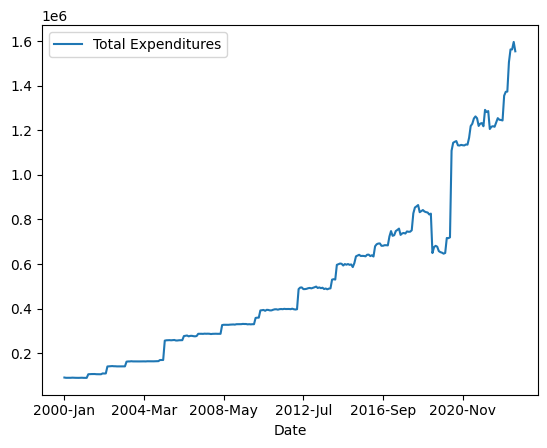

In [ ]:
expenditure_data.plot()

# Step 7: Stationarity Check (ADF Test)
**Checked for stationarity using the Augmented Dickey-Fuller (ADF) test:**

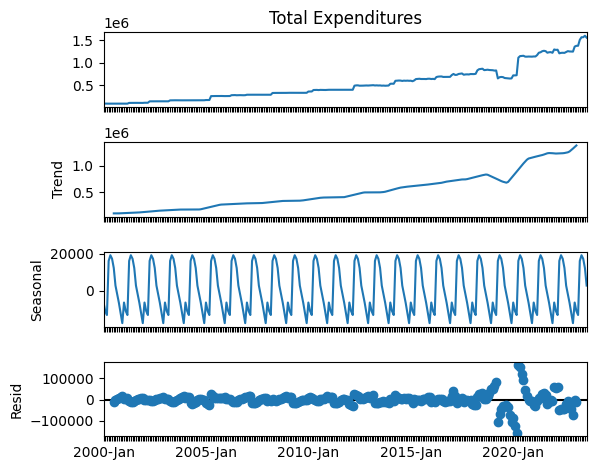

In [ ]:
result_total_expenditures.plot()

# Customize the x-axis labels with a gap between every 5 years
xticks = plt.xticks()[0]
new_labels = []
for i, label in enumerate(xticks):
    if i % (5 * 12) == 0:  # Assuming monthly data; 5 years x 12 months
        new_labels.append(data.index[int(label)])
    else:
        new_labels.append('')

plt.xticks(xticks, new_labels)

# Show the plot
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Performed ADF test on 'Total Expenditures'
result = adfuller(expenditure_data['Total Expenditures'])

# Extracted and print the p-value
p_value = result[1]
print(f'ADF Test p-value: {p_value}')

# Checked for the p-value to determine stationarity
if p_value <= 0.05:
    print('The data is stationary.')
else:
    print('The data is not stationary. You need to difference it.')

ADF Test p-value: 0.9986703715525862
The data is not stationary. You need to difference it.


# Step 7: Differencing

**If the data is not stationary (p-value > 0.05), so i difference it to make it stationary. We can also use differencing by lag 1 to remove trends.**

In [ ]:
# Differenced the data by lag 1
expenditure_data['Differenced'] = expenditure_data['Total Expenditures'].diff()
expenditure_data = expenditure_data.dropna()  # Remove the first NaN value created by differencing

# Performed ADF test on differenced data
result = adfuller(expenditure_data['Differenced'])
p_value = result[1]
print(f'ADF Test p-value after differencing: {p_value}')

if p_value <= 0.05:
    print('The differenced data is now stationary.')
else:
    print('Differencing did not make the data stationary. You might need more differencing.')

ADF Test p-value after differencing: 1.319701823123285e-07
The differenced data is now stationary.


# Step 7: Train-Test Split
**Spliting the data into training and testing sets.**

In [ ]:
len(expenditure_data)

283

In [ ]:
train_size = int(len(expenditure_data) * 0.8)
train_data = expenditure_data[:train_size]
test_data = expenditure_data[train_size:]

# Step 8: To Get Hyperparameters p d q:

**The Methord i chose is Auto_ARIMA**

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

# Fit the auto_arima model to your data
model = auto_arima(train_data['Total Expenditures'], seasonal=False, suppress_warnings=True, stepwise=True)

# Get the best order (p, d, q) determined by auto_arima
best_order = model.order

# Fit an ARIMA model using the best order
arima_model = ARIMA(train_data['Total Expenditures'], order=best_order).fit()

# Make predictions for the test set
pred = arima_model.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Total Expenditures'], pred))

print("Best ARIMA Order (p, d, q):", best_order)
print("RMSE:", rmse)


Best ARIMA Order (p, d, q): (0, 1, 0)
RMSE: 382526.0528423166


# Step 9: Build ARIMA Model

**ARIMA model has 3 components:**

1.   AR:
2.   MA:
3.   Integarted:

**For Building ARIMA;**

AR order p

MA order q

Integrated order d

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create and fit the ARIMA model
model = ARIMA(train_data['Total Expenditures'], order=(0, 1, 0))
model_fit = model.fit()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a time series 'data' and it's properly formatted
# Select the column containing Total Expenditures as your target variable
target_variable = data['Total Expenditures']

# Fit an ARIMA model
model = ARIMA(target_variable, order=(0, 1, 0))  # Replace (p, d, q) with your chosen order
model_fit = model.fit()

# Make predictions
n_forecast = 4  # Change this to the number of months you want to forecast
predictions = model_fit.predict(start=len(target_variable), end=len(target_variable) + n_forecast - 1, typ='levels')


In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming you have actual values and predictions
actual_values = [382526.05]
Predictions = [1554969.0]

# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predictions)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1374622471004.7024


TypeError: ignored

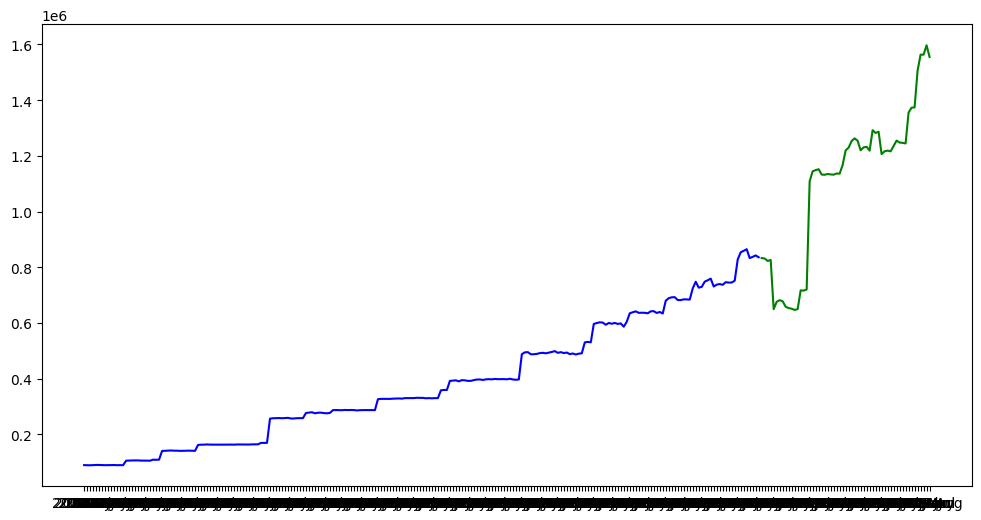

In [ ]:
# Create a range of dates for the future four months of 2023 with the correct time zone
future_dates = pd.date_range(start='2023-09-01', end='2023-12-01', freq='MS', tz='UTC')

# Plot the train and test data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Total Expenditures'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['Total Expenditures'], label='Test Data', color='green')

# Plot only the predicted values for the last four months of 2023
plt.plot(future_dates, predictions, label='ARIMA Predictions', color='red')

# Adjust the x-axis labels to display only every 5 years
years = pd.date_range(start='2020-01-01', end='2030-01-01', freq='5YS', tz='UTC')
plt.xticks(years, [year.strftime('%Y') for year in years])

plt.title('Total Expenditures of the Company (ARIMA Forecast)')
plt.xlabel('Date')
plt.ylabel('Total Expenditures')
plt.legend()
plt.grid(True)
plt.show()